In [1]:
import gpr

import numpy as np
from scipy.optimize import minimize

In [8]:
GP = gpr.GPR(verbose=True, random_state=0)

In [10]:
thetaS = np.array([250, 0.6, 0.08, np.pi/3])
GP.gen_synthetic_data(16000, thetaS)
# GP.extract_exposure()

Generating synthetic data...


In [11]:
# sample = np.array([-0.5, 0, 0, 0.5])
# sample = None
# GP.extract_data(sample=sample)

Removing data points that have residuals greater than 2 standard deviations from the mean...


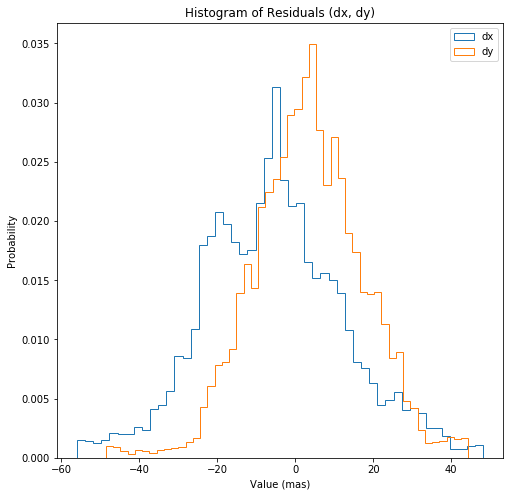

90.2937% of 14447data points are being kept.


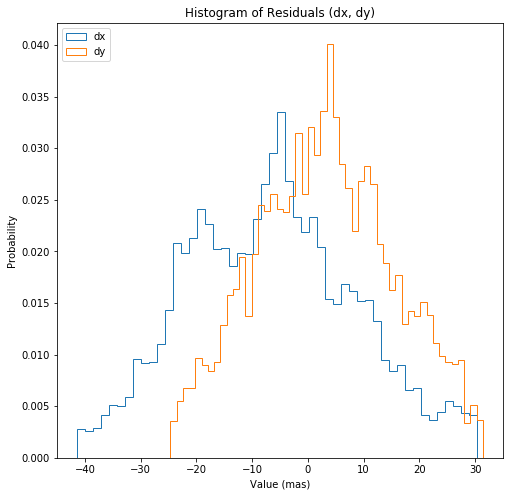

Splitting data into training and testing sets...
Generating white noise covariance function...


In [12]:
GP.remove_outliers(2)
GP.split_data(0.20)
GP.white_cov()

Generating elliptical covariance function...
Solving for posterior...
Posterior solved for in 51.99256110191345 seconds.
Current Log Marginal Likelihood: 6718.3269158334315
Fraction of test points within 1 standard deviation(s) of posterior predictive mean:
dx: 0.986159169550173; dy: 0.986159169550173
Chisq dx: 0.4829840591824093; Chisq dy: 0.4852480484077019


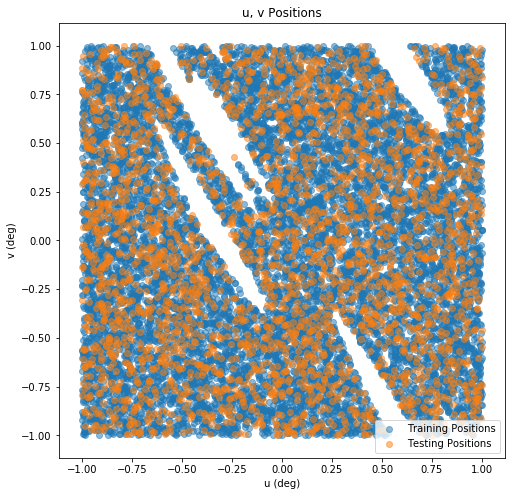

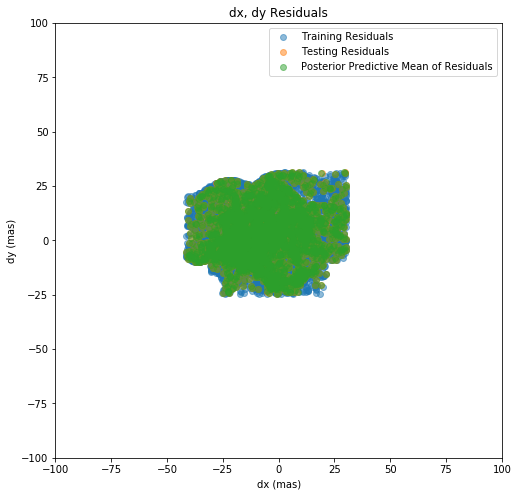

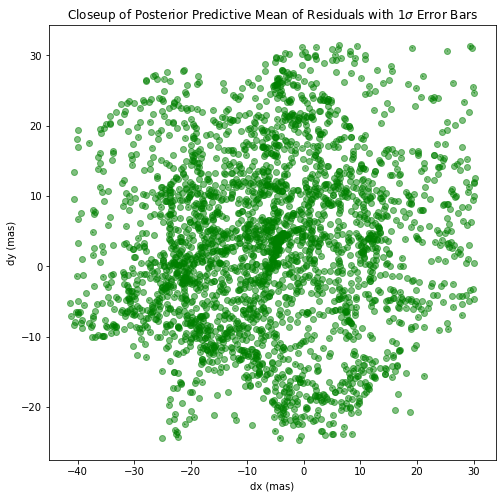

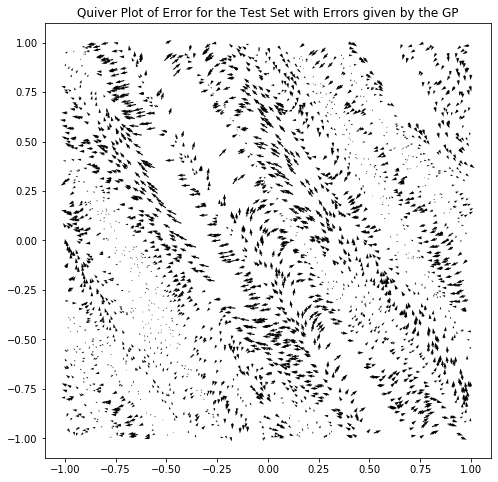

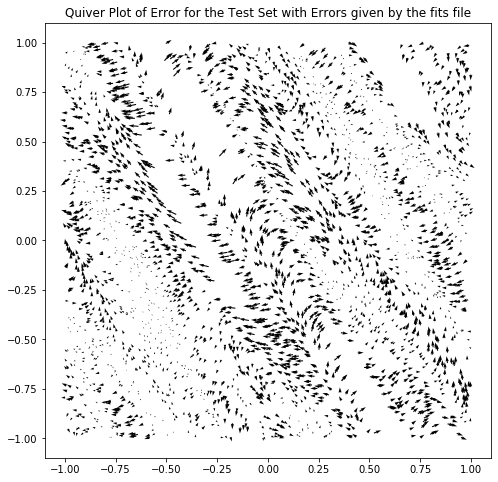

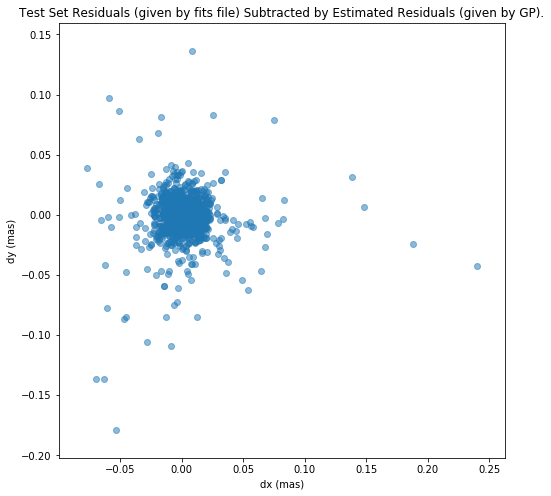

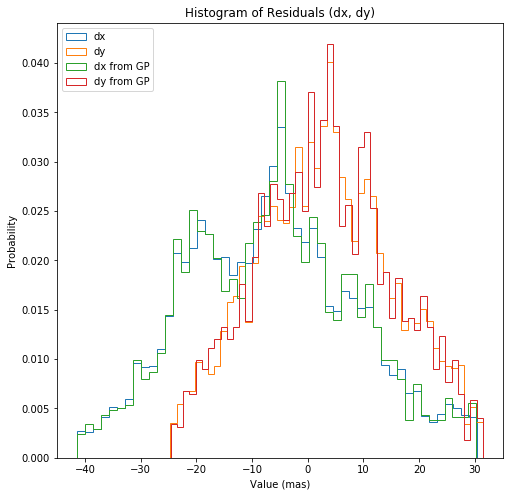

In [13]:
GP.fit(thetaS)
GP.summary()

In [6]:
def LML(theta, GP=GP, verbose=True):
    if verbose: print(theta)

    GP.fit(theta)
    LML = GP.get_nLML()
    return LML

In [7]:
GP.verbose = False
bounds = np.array([(1, 1e3), (1e-3, 100), (1e-3, 100), (-np.inf, np.inf)])
theta0 = np.array([100, 1, 1, 0])
result = minimize(LML, theta0, method='L-BFGS-B', bounds=bounds, options={'eps': 0.01})

print()
print(result.x)
print(thetaS)

[100.   1.   1.   0.]
[100.01   1.     1.     0.  ]
[100.     1.01   1.     0.  ]
[100.     1.     1.01   0.  ]
[1.e+02 1.e+00 1.e+00 1.e-02]
[100.99999877   0.99889      0.99889      0.        ]
[101.00999877   0.99889      0.99889      0.        ]
[100.99999877   1.00889      0.99889      0.        ]
[100.99999877   0.99889      1.00889      0.        ]
[1.00999999e+02 9.98890001e-01 9.98890001e-01 1.00000000e-02]
[104.99999384   0.99445001   0.99445001   0.        ]
[105.00999384   0.99445001   0.99445001   0.        ]
[104.99999384   1.00445001   0.99445001   0.        ]
[104.99999384   0.99445001   1.00445001   0.        ]
[1.04999994e+02 9.94450007e-01 9.94450007e-01 1.00000000e-02]
[120.99997413   0.97669003   0.97669003   0.        ]
[121.00997413   0.97669003   0.97669003   0.        ]
[120.99997413   0.98669003   0.97669003   0.        ]
[120.99997413   0.97669003   0.98669003   0.        ]
[1.20999974e+02 9.76690029e-01 9.76690029e-01 1.00000000e-02]
[184.99989527   0.905650

Current Log Marginal Likelihood: 976.2475086803353
Fraction of test points within 1 standard deviation(s) of posterior predictive mean:
dx: 0.9898477157360406; dy: 0.9898477157360406
Chisq dx: 2.804073362210838
Chisq d1: 3.009483400292475


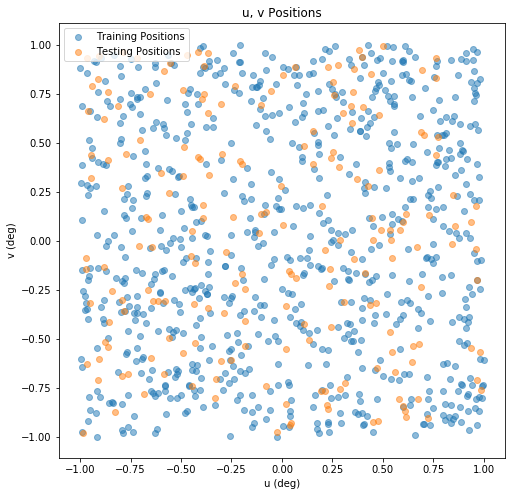

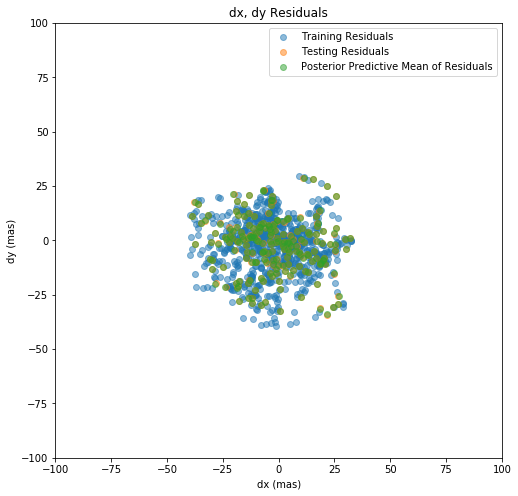

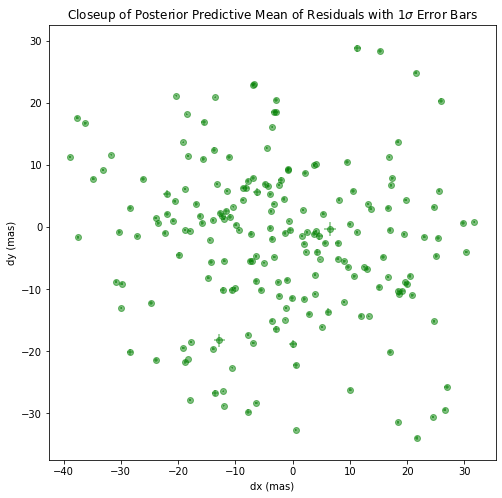

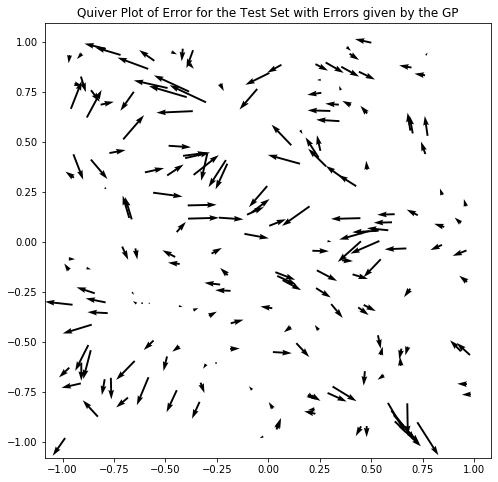

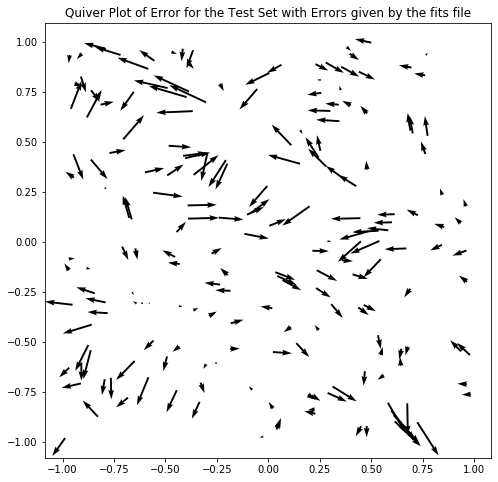

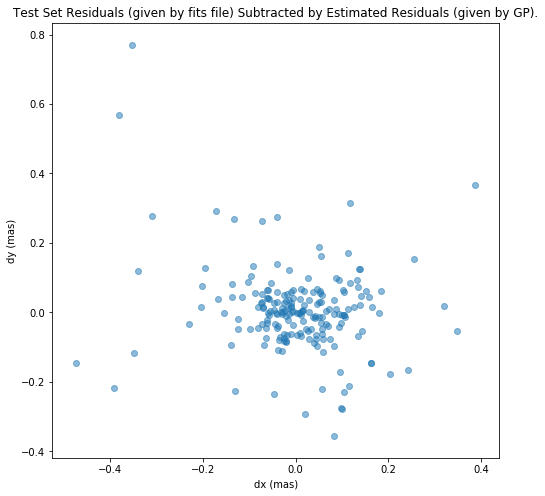

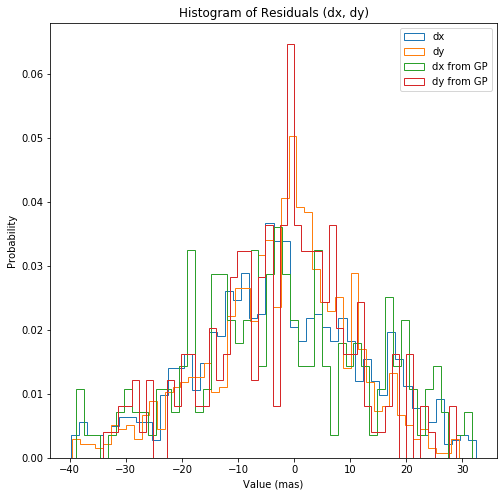

In [8]:
GP.fit(result.x)
GP.summary()